# Lab 7: Mini Project 3 

## Introduction

In mini-project 3, you'll be working with data related to the Covid-19 pandemic, using various predictors to strategically target vaccine delivery to high risk communities. In this week's Lab and Mini-Project, we will be focusing on **regularization**, a strategy to **prevent over-fitting**.

## Today's Lab: Regularization

Today's lab will use a Bike Sharing Data Set to predict bike rental count (hourly/daily), `cnt` , based on the environmental & seasonal settings. Click [here](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing) for Data Dictionary

We will look at two different types of regularization:
- **Lasso** which shrinks some coefficients towards 0. It is both a form of *feature selection* and a regularization technique! It simplifies the model by dropping out the less informative features and focuses on the most informative predictors
    - *Prevents overfitting primarily through feature selection*
- **Ridge Regression** shrinks coefficients without ever bringing them to zero.
    - *Prevents over-fitting primarily through a penalty that shrinks coefficients to prevent the model from capturing noise*

Click [here](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing) for Data Dictionary


**In This Lab we will:**
1. Load and process data
2. Experiment with Lasso and Ridge Regression
3. Explore how to select an appropriate regularization parameter

**After today's lab you should*
1. Understand the basic differences between Lasso and Ridge Regression
2. Know how to use both Lasso and Ridge regularization techniques in `sci-kit learn`
3. Feel confident in experimenting and selecting an appropriate regularization parameter

**A few things to note**
- *Lasso* is sometimes referred to as L1 regularization
- *Ridge Regression* is sometimes referred to as L2 regularization
- When we are performing regularization we often use a regularization parameter. This tells our model how large of a penalty we want to impose. You may see this value referred to as *alpha* ($\alpha$) or *lambda* ($\lambda$) depending on the text but they mean the same thing.


### Part 1: Load and Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold


#### Read in the CSV

In [2]:
data = pd.read_csv("bike.csv")

In [3]:
print(data.shape)
data.head()

(17379, 17)


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#### Tip: Control How Pandas Truncates Columns and Rows using `pd.set_option`

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
print(data.shape)
data.head()

(17379, 17)


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#### Set `instant` as the index

In [6]:
data.set_index(['instant'], inplace = True)
data.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
instant                                                                   
1        2011-01-01       1   0     1   0        0        6           0   
2        2011-01-01       1   0     1   1        0        6           0   
3        2011-01-01       1   0     1   2        0        6           0   
4        2011-01-01       1   0     1   3        0        6           0   
5        2011-01-01       1   0     1   4        0        6           0   

         weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
instant                                                                      
1                 1  0.24  0.2879  0.81        0.0       3          13   16  
2                 1  0.22  0.2727  0.80        0.0       8          32   40  
3                 1  0.22  0.2727  0.80        0.0       5          27   32  
4                 1  0.24  0.2879  0.75        0.0       3          10   13  
5                 1  0.24  0.2879  0.75        0.0       0           1    1

#### Check for Missing Values

In [7]:
na_count = pd.DataFrame(np.sum(data.isna(), axis = 0), columns = ["Count NAs"])
na_count

Count NAs
dteday              0
season              0
yr                  0
mnth                0
hr                  0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                 0
windspeed           0
casual              0
registered          0
cnt                 0

*No Missing Values!*

#### Check Data Types

In [8]:
data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We have a mix of *integers*, *floats*, and an *object*. 

* Season (1: spring, 2: summer, 3: fall, 4: winter)

* Year (0: 2011, 1:2012)

* Weather Situation (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered  clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets +  Thunderstorm + Mist, Snow + Fog)

* Date (Format: YYYY-MM-DD)

## Part 2: Pre-processing



#### One-Hot Encode Seasons 

First, map the numeric values to their category

In [9]:
seasons = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
data["season"].replace(seasons, inplace=True)
data.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
instant                                                                   
1        2011-01-01  Spring   0     1   0        0        6           0   
2        2011-01-01  Spring   0     1   1        0        6           0   
3        2011-01-01  Spring   0     1   2        0        6           0   
4        2011-01-01  Spring   0     1   3        0        6           0   
5        2011-01-01  Spring   0     1   4        0        6           0   

         weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
instant                                                                      
1                 1  0.24  0.2879  0.81        0.0       3          13   16  
2                 1  0.22  0.2727  0.80        0.0       8          32   40  
3                 1  0.22  0.2727  0.80        0.0       5          27   32  
4                 1  0.24  0.2879  0.75        0.0       3          10   13  
5                 1  0.24  0.2879  0.75        0.0       0           1    1

#### Then, one hot encode with Pandas Built-in `get_dummies` method
* https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [10]:
data = pd.get_dummies(data, columns = ['season'], drop_first = True)
data.head()

dteday  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
instant                                                                       
1        2011-01-01   0     1   0        0        6           0           1   
2        2011-01-01   0     1   1        0        6           0           1   
3        2011-01-01   0     1   2        0        6           0           1   
4        2011-01-01   0     1   3        0        6           0           1   
5        2011-01-01   0     1   4        0        6           0           1   

         temp   atemp   hum  windspeed  casual  registered  cnt  \
instant                                                           
1        0.24  0.2879  0.81        0.0       3          13   16   
2        0.22  0.2727  0.80        0.0       8          32   40   
3        0.22  0.2727  0.80        0.0       5          27   32   
4        0.24  0.2879  0.75        0.0       3          10   13   
5        0.24  0.2879  0.75        0.0       0           1    1   

         season_Spring  season_Summer  season_Winter  
instant                                               
1                    1              0              0  
2                    1              0              0  
3                    1              0              0  
4                    1              0              0  
5                    1              0              0

#### Drop Columns `dteday`, `casual`,`registered`

* `dteday`: relevant info captured in other columns
* `casual`+ `registered` = `cnt` - we don't need this captured twice

In [11]:
data.drop(['dteday', 'casual','registered'], axis=1, inplace=True)

## Part 3: Model Building

Split the features and target:

In [12]:
X = data.copy()
# pop will remove the last element from a list if called without any parameter. 
# It returns the value "popped
y = X.pop('cnt') 

print(X.head(5))

         yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
instant                                                                         
1         0     1   0        0        6           0           1  0.24  0.2879   
2         0     1   1        0        6           0           1  0.22  0.2727   
3         0     1   2        0        6           0           1  0.22  0.2727   
4         0     1   3        0        6           0           1  0.24  0.2879   
5         0     1   4        0        6           0           1  0.24  0.2879   

          hum  windspeed  season_Spring  season_Summer  season_Winter  
instant                                                                
1        0.81        0.0              1              0              0  
2        0.80        0.0              1              0              0  
3        0.80        0.0              1              0              0  
4        0.75        0.0              1              0              0  


Split our data into testing and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=25)




Fit the model on the training set

In [14]:
ols = LinearRegression().fit(X_train, y_train)

Predict on the training set

In [15]:
y_pred_train = ols.predict(X_train)
mse_train_ols = mean_squared_error(y_train, y_pred_train)
print("OLS-Train MSE: ", round(mse_train_ols,2))

OLS-Train MSE:  19682.02


In [16]:
y_pred_test = ols.predict(X_test)
mse_test_ols = mean_squared_error(y_test, y_pred_test)
print("OLS-Test MSE: ", round(mse_test_ols,2))

OLS-Test MSE:  20569.61


## Part 4: Ridge Regression and Lasso

These are regularization techniques that:
- reduces model complexity 
- prevent overfitting 
- adds a penalty for adding too many predictors 

#### Scaling our Features

* Ridge and Lasso regularization are sensitive to the *scale* of the input features.
* Regularization applies a penalty to the coefficients of the input features *based on their scale*

Let's fit with a scaled version of X

In [17]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

ridge = Ridge()

#### Choosing a Value of $\alpha$ with GridSearch

An important part of regularization is choosing the correct value of $(\alpha)$. 
- If we choose a value that is too small we might not penalize complexity enough and our model will overfit 
- If we choose a value that is too big we might keep out model from learning important information

One way to choose is by using **grid-search**

In [18]:
alpha_param = np.power(10, (np.linspace(-2, 1, 100)))
print(alpha_param)

[ 0.01        0.01072267  0.01149757  0.01232847  0.01321941  0.01417474
  0.01519911  0.01629751  0.01747528  0.01873817  0.02009233  0.02154435
  0.0231013   0.02477076  0.02656088  0.02848036  0.03053856  0.03274549
  0.03511192  0.03764936  0.04037017  0.04328761  0.04641589  0.04977024
  0.05336699  0.05722368  0.06135907  0.06579332  0.07054802  0.07564633
  0.08111308  0.0869749   0.09326033  0.1         0.10722672  0.1149757
  0.12328467  0.13219411  0.14174742  0.15199111  0.16297508  0.17475284
  0.18738174  0.2009233   0.21544347  0.23101297  0.24770764  0.26560878
  0.28480359  0.30538555  0.32745492  0.35111917  0.37649358  0.40370173
  0.43287613  0.46415888  0.49770236  0.53366992  0.57223677  0.61359073
  0.65793322  0.70548023  0.75646333  0.81113083  0.869749    0.93260335
  1.          1.07226722  1.149757    1.23284674  1.32194115  1.41747416
  1.51991108  1.62975083  1.7475284   1.87381742  2.009233    2.15443469
  2.3101297   2.47707636  2.65608778  2.84803587  3.

#### Setting up some helper functions 

This function to calculate a vector of mean and standard deviation values for each parameter.
* It takes a grid search object which is the result of using scikit-learn's GridSearchCV 
* It also takes and the number of trials which corresponds to the number of *hyperparameter combinations* evaluated during the grid search. In the context of regularization (like Ridge or Lasso), these "trials" correspond to different values of the regularization parameter.
* It then returns vectors with mean and standard deviation values for each train (in this case, regularization parameter)

In [28]:
def vector_values(grid_search):
    final = grid_search.cv_results_
    mean_vec = -np.array(final["mean_test_score"])  
    std_vec = np.array(final["std_test_score"])
    return mean_vec, std_vec


This function highlights the minimum in a Series or DataFrame (general good function to use)

In [29]:
def highlight_min(data, color='yellow'):
    attr = f'background-color: {color}'
    if data.ndim == 1:  # Series
        is_min = data == data.min()  # data == data.min() compares each value in data to the minimum; True if min. is_min is thus Boolean series
        return [attr if v else '' for v in is_min]
    return ''

#### Experiment with Ridge GridSearchCV

Below we:
* Define out parameter grid using the parameters defined above
* Initialize the grid search with the ridge estimator
* Perform an exhaustive search, choosing the best model using 10 fold CV and neg_mean_squared_error as our error
* Use our handy function `vector_values` from above to create a dataframe to report our results

In [39]:
#Creating a parameters grid
param_grid = [{
    'alpha': alpha_param
}]

#Running Grid Search over the alpha (regularization) parameter
kfcv = KFold(n_splits=10, random_state = 25, shuffle=True)
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=kfcv, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Extract results for all tested alphas
tested_alphas = []
for params in grid_search_ridge.cv_results_['params']:
    tested_alphas.append(params['alpha'])


# Store mean and standard deviation values
mean_vec_ridge, std_vec_ridge = vector_values(grid_search_ridge)
results_cv_ridge = pd.DataFrame({'alpha': tested_alphas, 'MSE': mean_vec_ridge})


In [40]:
results_cv_ridge

alpha           MSE
0    0.010000  19726.303359
1    0.010723  19726.303330
2    0.011498  19726.303299
3    0.012328  19726.303266
4    0.013219  19726.303230
5    0.014175  19726.303192
6    0.015199  19726.303151
7    0.016298  19726.303108
8    0.017475  19726.303061
9    0.018738  19726.303010
10   0.020092  19726.302956
11   0.021544  19726.302899
12   0.023101  19726.302836
13   0.024771  19726.302770
14   0.026561  19726.302699
15   0.028480  19726.302622
16   0.030539  19726.302540
17   0.032745  19726.302452
18   0.035112  19726.302358
19   0.037649  19726.302257
20   0.040370  19726.302149
21   0.043288  19726.302033
22   0.046416  19726.301908
23   0.049770  19726.301774
24   0.053367  19726.301631
25   0.057224  19726.301478
26   0.061359  19726.301313
27   0.065793  19726.301137
28   0.070548  19726.300948
29   0.075646  19726.300745
30   0.081113  19726.300527
31   0.086975  19726.300294
32   0.093260  19726.300044
33   0.100000  19726.299776
34   0.107227  19726.299489
35   0.114976  19726.299181
36   0.123285  19726.298851
37   0.132194  19726.298497
38   0.141747  19726.298117
39   0.151991  19726.297710
40   0.162975  19726.297274
41   0.174753  19726.296807
42   0.187382  19726.296306
43   0.200923  19726.295769
44   0.215443  19726.295193
45   0.231013  19726.294576
46   0.247708  19726.293914
47   0.265609  19726.293206
48   0.284804  19726.292446
49   0.305386  19726.291632
50   0.327455  19726.290759
51   0.351119  19726.289824
52   0.376494  19726.288822
53   0.403702  19726.287748
54   0.432876  19726.286597
55   0.464159  19726.285365
56   0.497702  19726.284044
57   0.533670  19726.282629
58   0.572237  19726.281113
59   0.613591  19726.279489
60   0.657933  19726.277750
61   0.705480  19726.275888
62   0.756463  19726.273893
63   0.811131  19726.271757
64   0.869749  19726.269470
65   0.932603  19726.267022
66   1.000000  19726.264401
67   1.072267  19726.261595
68   1.149757  19726.258593
69   1.232847  19726.255380
70   1.321941  19726.251942
71   1.417474  19726.248265
72   1.519911  19726.244332
73   1.629751  19726.240126
74   1.747528  19726.235630
75   1.873817  19726.230823
76   2.009233  19726.225686
77   2.154435  19726.220198
78   2.310130  19726.214336
79   2.477076  19726.208075
80   2.656088  19726.201393
81   2.848036  19726.194261
82   3.053856  19726.186652
83   3.274549  19726.178538
84   3.511192  19726.169888
85   3.764936  19726.160672
86   4.037017  19726.150856
87   4.328761  19726.140406
88   4.641589  19726.129287
89   4.977024  19726.117464
90   5.336699  19726.104899
91   5.722368  19726.091554
92   6.135907  19726.077392
93   6.579332  19726.062372
94   7.054802  19726.046457
95   7.564633  19726.029608
96   8.111308  19726.011787
97   8.697490  19725.992955
98   9.326033  19725.973079
99  10.000000  19725.952125

In [41]:
top_10_results_cv_ridge = results_cv_ridge.sort_values(by='MSE', ascending=True).head(10)

styled_top_10 = top_10_results_cv_ridge.style.apply(highlight_min, subset=['MSE'])
display(styled_top_10)


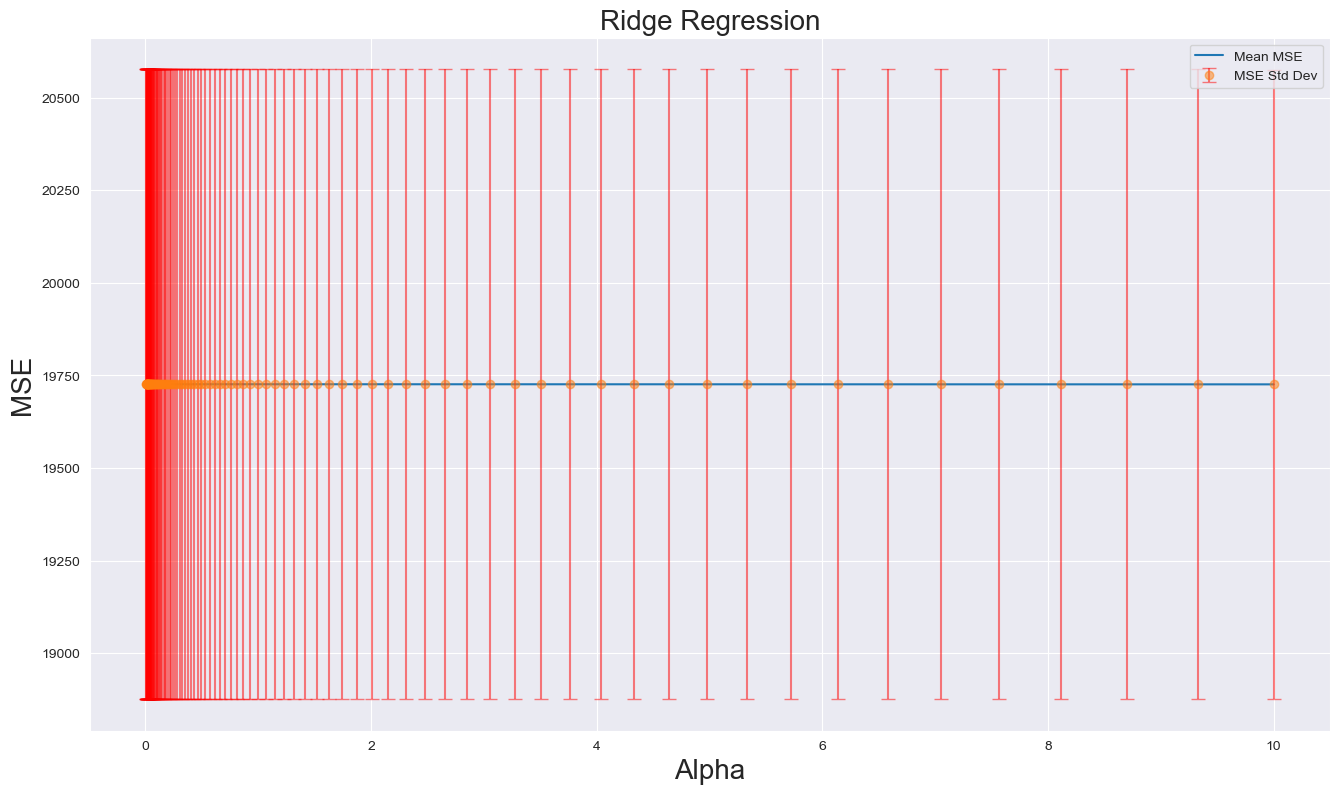

In [42]:
mean_vec, std_vec = vector_values(grid_search_ridge)

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title('Ridge Regression', fontsize=20)
ax.plot(alpha_param, mean_vec, label='Mean MSE')
ax.errorbar(alpha_param, mean_vec, yerr=std_vec, fmt='o', ecolor='r', capsize=5, alpha=0.5, label='MSE Std Dev')
ax.set_ylabel("MSE", fontsize=20)
ax.set_xlabel("Alpha", fontsize=20)
plt.legend()
plt.show()

*The ideal alpha is often located at the valley of the curve, where the MSE is minimized before it starts to increase again.*

#### We can do something similar for Lasso with GridSearch

This implementation uses a slightly different approach, leveraging the `Pipelines`

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

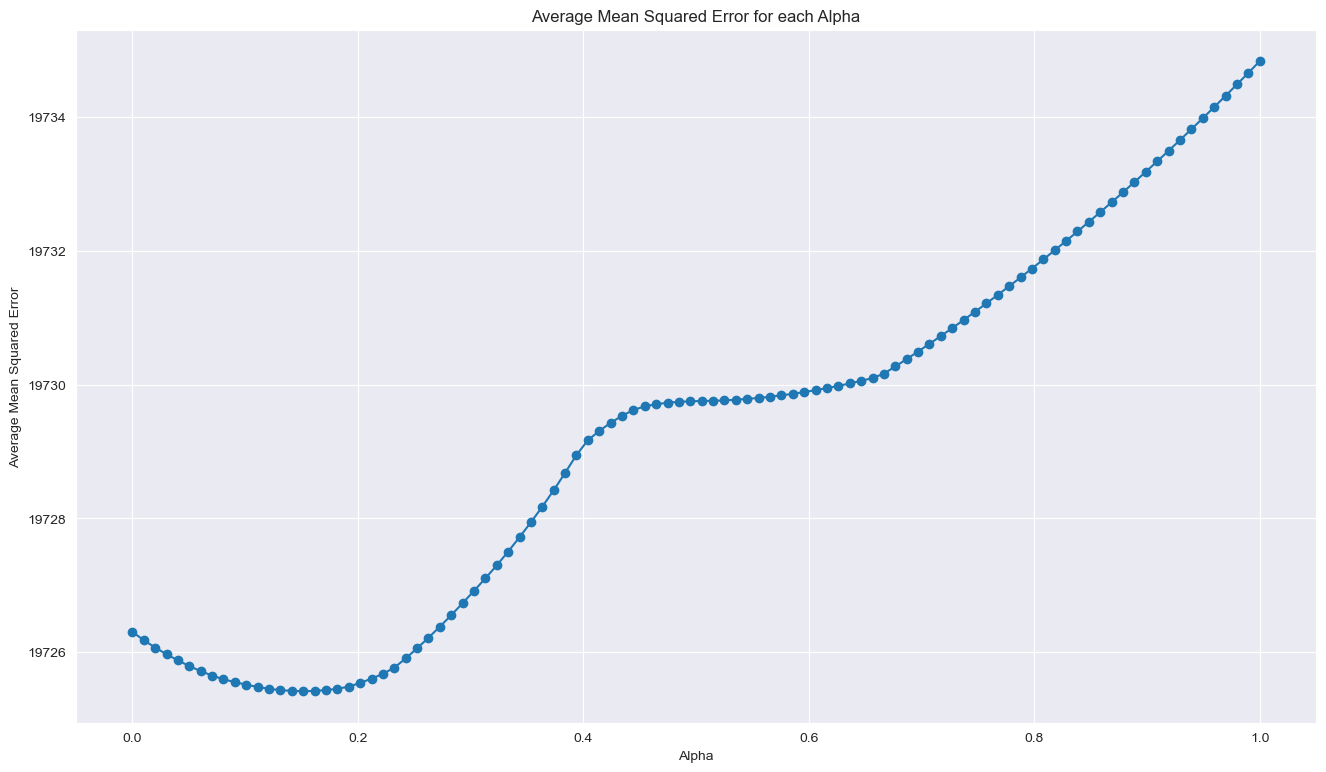

Best alpha: 0.15151515151515152
Best MSE: 19725.4152809258


In [44]:
# Defining the range of alpha values to search over
alpha_range = np.linspace(0, 1, 100)
print(alpha_range)
param_grid = {'lasso__alpha': alpha_range}

# Creating a pipeline and GridSearchCV object
pipeline = make_pipeline(StandardScaler(), Lasso(random_state=1))
grid_search = GridSearchCV(pipeline, param_grid, cv=kfcv, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV object
grid_search.fit(X_train, y_train)

# Extract results and convert 'mean_test_score' to positive values
# Note: the term mean_test_score refers to the average mean squared error (MSE) 
# across the cross-validation folds for each alpha value when using GridSearchCV.
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_score'] = -results['mean_test_score']

# Plotting mean test scores for each alpha value using fig, ax
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(alpha_range, results['mean_test_score'], marker='o')
ax.set_xlabel('Alpha')
ax.set_ylabel('Average Mean Squared Error')
ax.set_title('Average Mean Squared Error for each Alpha')
plt.show()

# Getting the best alpha value and corresponding MSE
best_alpha = grid_search.best_params_['lasso__alpha']
best_mse = grid_search.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best MSE: {-best_mse}")

# Applying the highlighting function only to 'mean_test_score' column
results_style = results[['params', 'mean_test_score']].style.apply(
    highlight_min, subset=['mean_test_score'])

results_style